# **Importing Necessary Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import StrMethodFormatter


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Data in a datafram df**

In [0]:
df = pd.read_csv('drive/My Drive/US_Accidents_Dec19.csv')

# **Data Cleaning like removing null values by replacing with mean and mode**

In [0]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Temperature(F)'] = df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].mean())
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())
df['Weather_Condition'] = df['Weather_Condition'].fillna(df['Weather_Condition'].mode().iloc[0])
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df['Sunrise_Sunset'] = df['Sunrise_Sunset'].fillna(df['Sunrise_Sunset'].mode().iloc[0])
df['Wind_Direction'] = df['Wind_Direction'].fillna(df['Wind_Direction'].mode().iloc[0])

# **Correlation Matrix to check the Dependency**

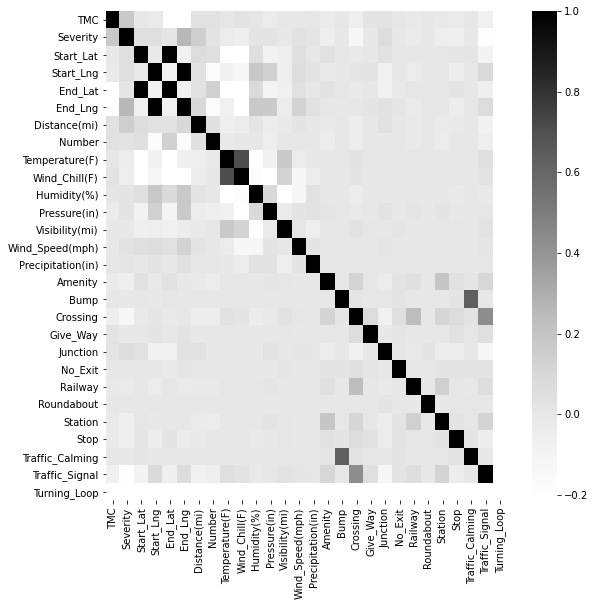

In [5]:
corr = df.corr() 
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap='Greys', robust=True)

In [12]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)
df["Time_Diff"] = (df.End_Time - df.Start_Time).astype('timedelta64[m]')
df["Start_Date"] = df["Start_Time"].dt.date
df["End_Date"] = df["End_Time"].dt.date
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour
df = df[(df["Year"] > 2015) & (df["Year"] < 2020)]
group = df.groupby(["Year"]).agg(Count = ('ID','count'))
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Time_Diff,Start_Date,End_Date,Year,Month,Day,Hour
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,51.326849,91.0,29.68,10.0,Calm,8.298064,0.020000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,314.0,2016-02-08,2016-02-08,2016,2,8,5
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,51.326849,100.0,29.65,10.0,Calm,8.298064,0.000000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,30.0,2016-02-08,2016-02-08,2016,2,8,6
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.300000,100.0,29.67,10.0,SW,3.500000,0.020495,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,30.0,2016-02-08,2016-02-08,2016,2,8,6
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.000000,96.0,29.64,9.0,SW,4.600000,0.020495,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,30.0,2016-02-08,2016-02-08,2016,2,8,7
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.300000,89.0,29.65,6.0,SW,3.500000,0.020495,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,30.0,2016-02-08,2016-02-08,2016,2,8,7


In [13]:
df.groupby(["Year","Severity"]).size().unstack()

Severity,1,2,3,4
Year,,,,
2016,225,269847,126178,14350
2017,282,461971,231081,24149
2018,259,574016,292570,25770
2019,202,687573,237790,28065


<function matplotlib.pyplot.show>

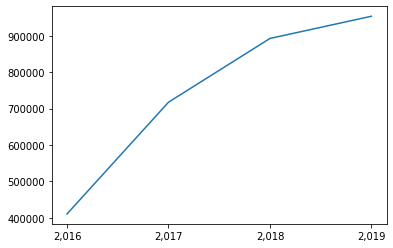

In [16]:
year = df.groupby(["Year"]).agg(Count = ('ID','count'))
year_sev = df.groupby(["Year","Severity"]).size().unstack()
plt.plot(year.index, year["Count"])
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(np.arange(2016, 2020, 1.0))
plt.show

<function matplotlib.pyplot.show>

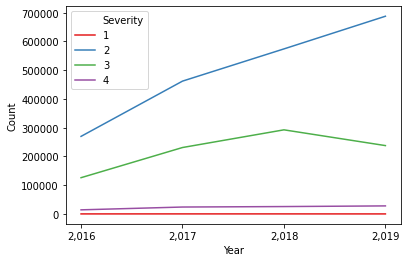

In [17]:
severity_year = df.groupby(["Year","Severity"]).agg(Count = ('ID','count')).reset_index()
sns.lineplot(x='Year',y='Count',hue="Severity",data=severity_year,palette="Set1")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(np.arange(2016, 2020, 1.0))
plt.show

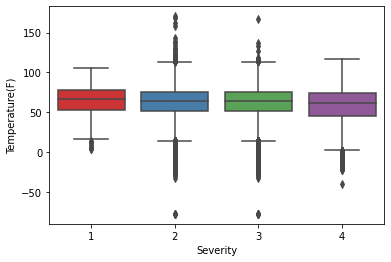

In [18]:
sns.boxplot(x="Severity", y="Temperature(F)", data=df, palette="Set1")

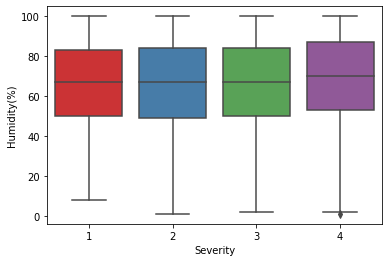

In [19]:
sns.boxplot(x="Severity", y="Humidity(%)", data=df, palette="Set1")

In [0]:
# Drop unnecessary columns with more than 70% null values
df = df.drop( ['ID','Source','Start_Time','End_Time','TMC','End_Lat','End_Lng','Number','City', 'Country', 'Description','City','Timezone', 'Street', 'Side', 'Zipcode', 'Airport_Code', 'Weather_Timestamp','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [21]:
df.isnull().sum()

Severity             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
County               0
State                0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
Time_Diff            0
Start_Date           0
End_Date             0
Year                 0
Month                0
Day                  0
Hour                 0
dtype: int64

# **Considering all the road conditions**

In [0]:
df1=df.filter(['Bump','Crossing','No_Exit','Roundabout','Stop','Severity'],axis=1)

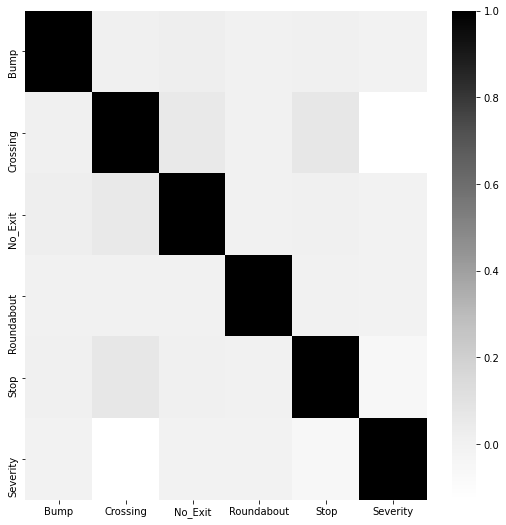

In [23]:
corr = df1.corr() 

#change size of figure ax=ax
#fig, ax = plt.subplots(figsize=(9,9)) 
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap='Greys', robust=True)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
from sklearn.model_selection import train_test_split
RSEED = 30

X_train, X_test, y_train, y_test = train_test_split(df1.drop('Severity', axis=1), df1['Severity'], test_size=0.33, random_state=66)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train, y_train)


In [0]:
y_pred = classifier.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       284
           2       0.67      1.00      0.80    598259
           3       0.70      0.00      0.00    266455
           4       0.00      0.00      0.00     27303

    accuracy                           0.67    892301
   macro avg       0.34      0.25      0.20    892301
weighted avg       0.66      0.67      0.54    892301



In [24]:
print(confusion_matrix(y_test,y_pred))

[[     0    284      0      0]
 [     0 598257      2      0]
 [     0 266448      7      0]
 [     0  27302      1      0]]


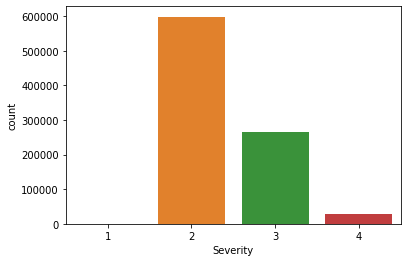

In [25]:
sns.countplot(y_test)

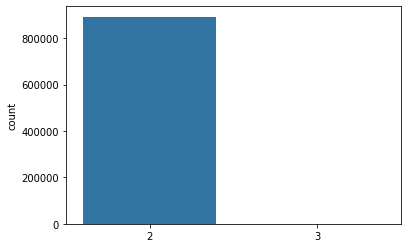

In [26]:
sns.countplot(y_pred)

# **Considering all the Weather Conditions**

In [0]:
df2=df.filter(['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Severity'],axis=1)

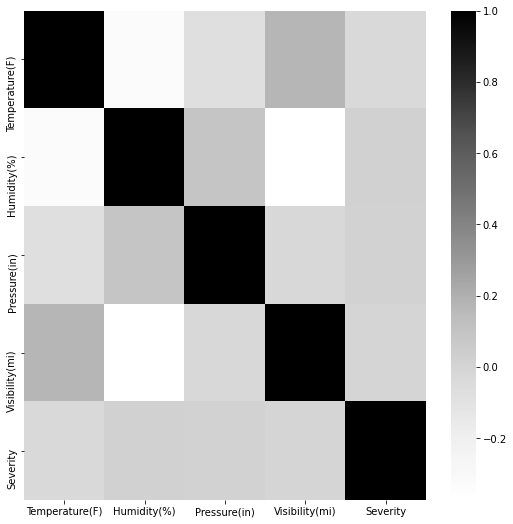

In [25]:
corr = df2.corr() 
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap='Greys', robust=True)

In [0]:
from sklearn.model_selection import train_test_split
RSEED = 30

X_train1, X_test1, y_train1, y_test1 = train_test_split(df2.drop('Severity', axis=1), df2['Severity'], test_size=0.33, random_state=66)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6)
classifier.fit(X_train1, y_train1)


In [0]:
y_pred1 = classifier.predict(X_test1)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       284
           2       0.69      0.85      0.76    598259
           3       0.39      0.22      0.28    266455
           4       0.30      0.16      0.21     27303

    accuracy                           0.64    892301
   macro avg       0.35      0.31      0.31    892301
weighted avg       0.59      0.64      0.60    892301



In [41]:
print(confusion_matrix(y_test1,y_pred1))

[[     0    232     50      2]
 [   123 506194  85497   6445]
 [    58 205323  57531   3543]
 [     7  18468   4509   4319]]


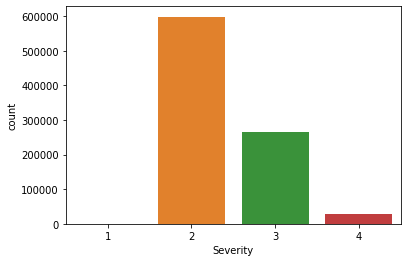

In [42]:
sns.countplot(y_test1)

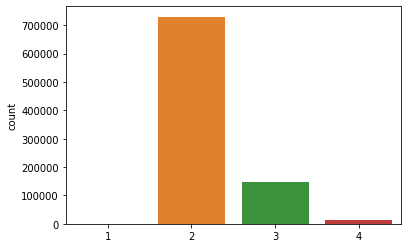

In [43]:
sns.countplot(y_pred1)